# This notebook represents the Predictive Analysis of "Delivery Time" using the Simple Linear Regression model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
def read_data():
    data = pd.read_csv("C:/Users/Rushikesh/Desktop/Machine Learning/Projects and Assignments/Project - 1&2_ Simple_Reg/delivery_time.csv")
    return (data)

In [277]:
data = read_data()
data.head(5)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# Making a copy of original data and performing operations on copied data only

In [257]:
df = data.copy()
df.head(5)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# Exploratory Data Analysis (EDA)

In [270]:
a =  df.info()
a

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [271]:
a1 = df.describe()
a1

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [272]:
a2 = df.duplicated().sum()             ## Finding if any duplicate values are present in dataset
a2

0

In [273]:
a3 = df['Delivery Time'].unique()
a3

array([21.  , 13.5 , 19.75, 24.  , 29.  , 15.35, 19.  ,  9.5 , 17.9 ,
       18.75, 19.83, 10.75, 16.68, 11.5 , 12.03, 14.88, 13.75, 18.11,
        8.  , 17.83, 21.5 ])

In [274]:
a4 = df['Sorting Time'].unique()
a4

array([10,  4,  6,  9,  7,  3,  8,  2,  5], dtype=int64)

In [275]:
a5 = df.isnull().sum()                 ## To see if there are any null values in dataset
a5

Delivery Time    0
Sorting Time     0
dtype: int64

<Axes: >

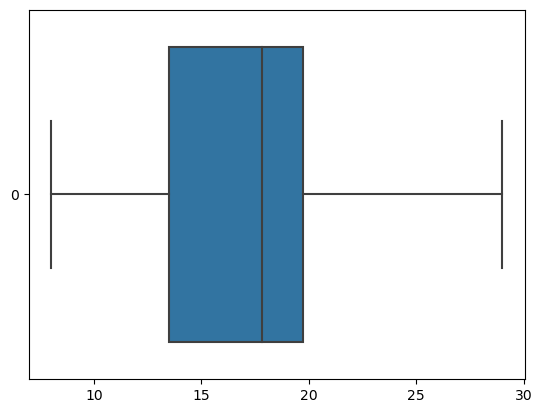

In [266]:
a6 = sns.boxplot(df['Delivery Time'], orient = 'h')     ## No outliers are present
a6

<Axes: >

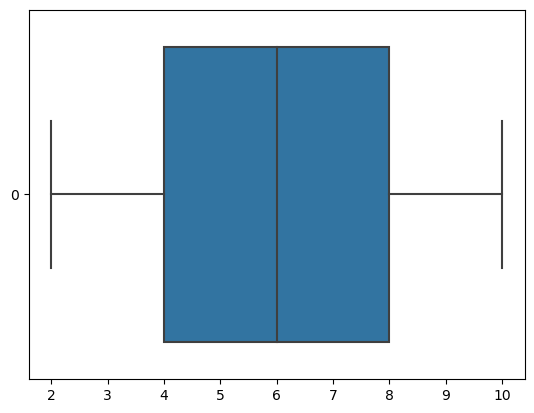

In [267]:
a7 = sns.boxplot(df['Sorting Time'], orient = 'h')   ## No outliers are present
a7

# Correlation Analysis

In [268]:
a8 = round(df.corr(),2)      ## Predictor and Target variables are highly correlated.
a8

,Delivery Time,Sorting Time
Delivery Time,1.00,0.83
Sorting Time,0.83,1.00


<Axes: >

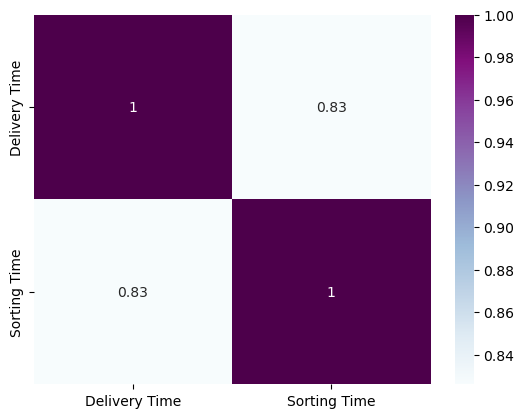

In [269]:
a9 = sns.heatmap(df.corr(), annot = True, cbar = True, cmap = 'BuPu')     ## Other cmap = YlGnBu/Blues/Greens etc.
a9

# Dividing the dataset into Predictor(X) and Target variable (Y)

In [282]:
X = df['Sorting Time']
Y = df['Delivery Time']

In [281]:
X = df['Sorting Time'].values.reshape(-1,1)      ## reshaping the predictor data in 1D format
print(X)

[[10]
 [ 4]
 [ 6]
 [ 9]
 [10]
 [ 6]
 [ 7]
 [ 3]
 [10]
 [ 9]
 [ 8]
 [ 4]
 [ 7]
 [ 3]
 [ 3]
 [ 4]
 [ 6]
 [ 7]
 [ 2]
 [ 7]
 [ 5]]


In [279]:
Y = df['Delivery Time'].values.reshape(-1,1)     #### reshaping the Target data in 1D format
print(Y)

[[21.  ]
 [13.5 ]
 [19.75]
 [24.  ]
 [29.  ]
 [15.35]
 [19.  ]
 [ 9.5 ]
 [17.9 ]
 [18.75]
 [19.83]
 [10.75]
 [16.68]
 [11.5 ]
 [12.03]
 [14.88]
 [13.75]
 [18.11]
 [ 8.  ]
 [17.83]
 [21.5 ]]


# Checking the distribution of Predictor and Target variable

C:\Users\Rushikesh\AppData\Local\Temp\ipykernel_12952\2363546336.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sorting Time'])


Skewness of data is : 0.047115474210530174


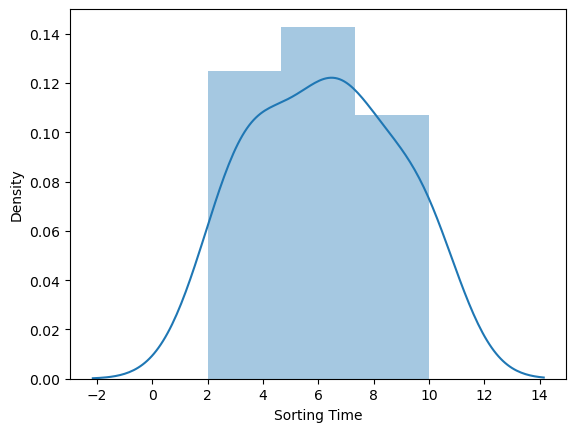

In [305]:
sns.distplot(df['Sorting Time'])      
print("Skewness of data is :", df['Sorting Time'].skew())           ## Data is normally skewed and fairly symmetrical

C:\Users\Rushikesh\AppData\Local\Temp\ipykernel_12952\2764583584.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Delivery Time'])


Skewness of data is : 0.3523900822831107


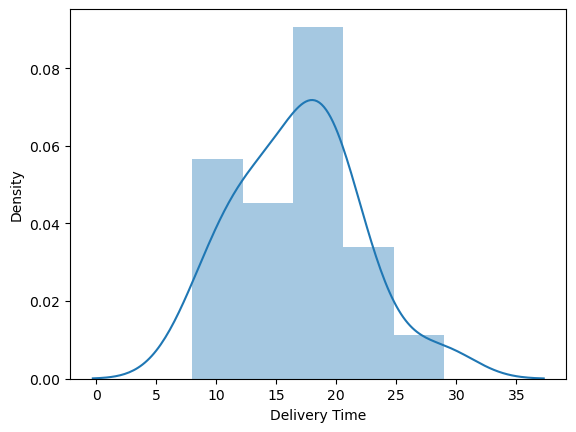

In [307]:
sns.distplot(df['Delivery Time'])
print("Skewness of data is :", df['Delivery Time'].skew())            ## Data is normally skewed and fairly symmetrical

## There is no need to apply any transformation on data to make it normally distributed

# Importing Sklearn library to divide the X and Y into training and testing based on training size

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state=4453)

In [79]:
X_train.shape, Y_train.shape

((16, 1), (16, 1))

In [80]:
X_test.shape, Y_test.shape

((5, 1), (5, 1))

# Visualizing the dataset to see residuals

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

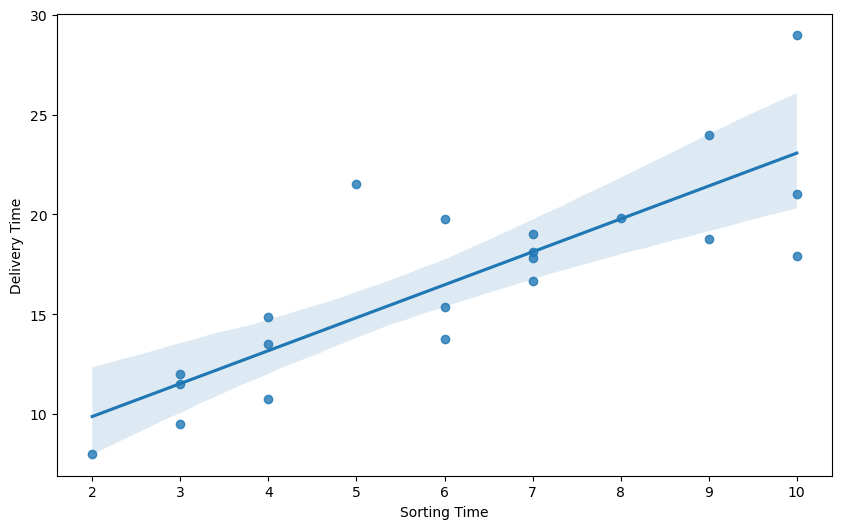

In [297]:
plt.subplots(figsize = (10,6))
sns.regplot(data = df, x = "Sorting Time", y = "Delivery Time")   ## Some Residuals are away from Regression line

#  Importing linear regression model

In [164]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [83]:
model = LinearRegression()
model

LinearRegression()

# Model Building - Fitting the training data into the model so that it learns from answers i.e Fitting and Learning

In [85]:
fit = model.fit(X_train, Y_train)     ## Model with answers is trained and it learned the relation between X_train and Y_train
fit

LinearRegression()

# Model Prediction

In [129]:
pred_train = fit.predict(X_train)
pred_train

array([[18.77440897],
       [20.61522002],
       [18.77440897],
       [13.25197584],
       [24.29684211],
       [13.25197584],
       [16.93359793],
       [15.09278689],
       [22.45603106],
       [22.45603106],
       [11.4111648 ],
       [16.93359793],
       [11.4111648 ],
       [18.77440897],
       [13.25197584],
       [18.77440897]])

In [236]:
print("R2 score of Training dataset is :", round(r2_score(Y_train, pred_train),2))

R2 score of Training dataset is : 0.7


# Predicting the Y_test values using X_test with the help of Learning already done

In [87]:
pred = fit.predict(X_test)
pred

array([[11.4111648 ],
       [24.29684211],
       [24.29684211],
       [ 9.57035375],
       [16.93359793]])

# Comparing the predicted values with actual Y_test values to see what is the error (manual method)

In [94]:
pred_ = pd.DataFrame(data = pred, columns=['pred'])
pred_

,pred
0,11.411165
1,24.296842
2,24.296842
3,9.570354
4,16.933598


In [95]:
Y_test = pd.DataFrame(data = Y_test, columns=['Y_test'])
Y_test

,Y_test
0,9.50
1,17.90
2,21.00
3,8.00
4,19.75


In [263]:
compare = pd.concat([Y_test, pred_], axis = 1)
compare

,Y_test,pred
0,9.50,11.411165
1,17.90,24.296842
2,21.00,24.296842
3,8.00,9.570354
4,19.75,16.933598


# Visualizing the data and it's textual insights gathered so far

<Axes: >

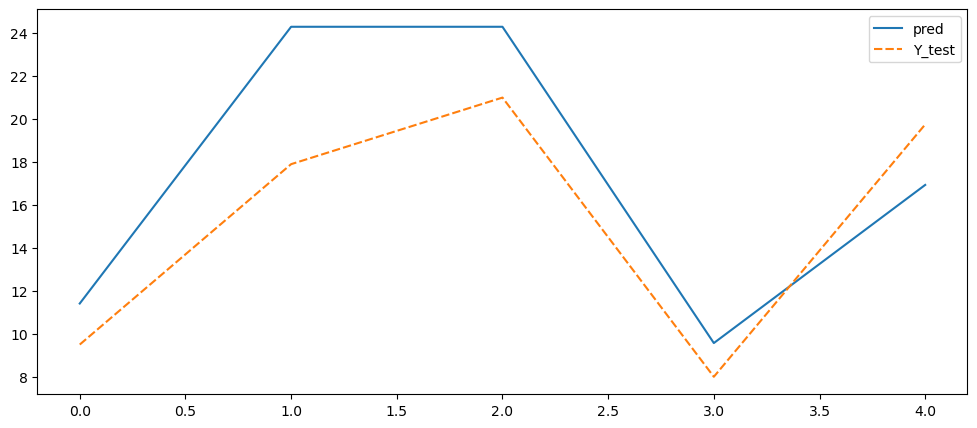

In [102]:
plt.subplots(figsize = (12,5))
sns.lineplot(data = compare)      ## Shows diff betn pred and Y_test values is +vely high

# Finding the Accuracy of the predicted values

In [237]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score
from math import sqrt

In [291]:
print("The R2_score of Linear Regression testing is :", round(r2_score(Y_test, pred),2))

The R2_score of Linear Regression testing is : 0.55


In [239]:
print("MAE is :", mean_absolute_error(pred, Y_test))

MAE is : 3.198320966350303


In [240]:
print("MSE is :", mean_squared_error(pred, Y_test))   ## MSE is the variance of the residuals.

## Residual is vertical distance between data point and linear regression equation (or predicted values)

MSE is : 13.167887840667749


In [241]:
print("Sqrt of MSE is :", sqrt( mean_squared_error(pred, Y_test)))    ## Also called as standard error of estimate

## Sqrt(MSE) shows the Standard Deviation of the residuals.

Sqrt of MSE is : 3.6287584434166664


# Visualizing residual distance using Linear Regression model

<Axes: xlabel='Y_test', ylabel='pred'>

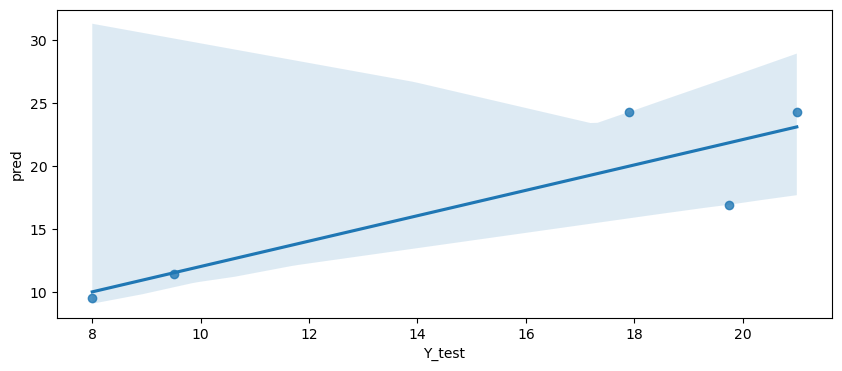

In [304]:
plt.subplots(figsize = (10,4))
sns.regplot(data = compare, x = 'Y_test', y = 'pred')

## Residual distance is high and so does the error

# If we compare Training and Testing R2_Score, we can conclude that model is somehwhat overfitted. And we cannot use this model for future values.

# To increase the R2_Score we use Ridge and Lasso Regression models

In [217]:
Ridge = Ridge
Ridge

Ridge()

In [218]:
Ridge_fit = Ridge.fit(X_train, Y_train)
Ridge_fit

Ridge()

In [219]:
Ridge_pred = Ridge_fit.predict(X_test)
Ridge_pred

array([[11.49106383],
       [24.2012766 ],
       [24.2012766 ],
       [ 9.67531915],
       [16.93829787]])

In [220]:
Ridge_pred1 = pd.DataFrame(data = Ridge_pred, columns=['Ridge_pred'])
Ridge_pred1

,Ridge_pred
0,11.491064
1,24.201277
2,24.201277
3,9.675319
4,16.938298


In [221]:
Ridge_concat = pd.concat([Y_test, Ridge_pred1], axis = 1)
Ridge_concat

,Y_test,Ridge_pred
0,9.50,11.491064
1,17.90,24.201277
2,21.00,24.201277
3,8.00,9.675319
4,19.75,16.938298


In [289]:
print("The R2_score of  Ridge Regression testing is:", round(r2_score(Y_test, Ridge_pred), 2))

The R2_score of  Ridge Regression testing is: 0.56


# Use of Ridge Regression model has given us the same accuracy as Linear Regression model

# Using the standard scalar to improve the accuracy of the model

In [242]:
from sklearn.preprocessing import StandardScaler

In [243]:
SC = StandardScaler()
SC

StandardScaler()

In [244]:
X_SC = SC.fit_transform(X)
X_SC

array([[ 1.53562462],
       [-0.88298415],
       [-0.07678123],
       [ 1.13252315],
       [ 1.53562462],
       [-0.07678123],
       [ 0.32632023],
       [-1.28608562],
       [ 1.53562462],
       [ 1.13252315],
       [ 0.72942169],
       [-0.88298415],
       [ 0.32632023],
       [-1.28608562],
       [-1.28608562],
       [-0.88298415],
       [-0.07678123],
       [ 0.32632023],
       [-1.68918708],
       [ 0.32632023],
       [-0.47988269]])

In [245]:
x_train, x_test, y_train, y_test = train_test_split(X_SC, Y, train_size=0.8,random_state=1234)

In [246]:
x_train.shape, y_train.shape

((16, 1), (16, 1))

In [247]:
x_test.shape, y_test.shape

((5, 1), (5, 1))

# Again use Linear Regression model to predict using SC

In [248]:
model = LinearRegression()
model

LinearRegression()

In [249]:
model_fit = model.fit(x_train, y_train)
model_fit

LinearRegression()

In [250]:
SC_pred = model_fit.predict(x_test)
SC_pred

array([[21.07769231],
       [11.46846154],
       [16.27307692],
       [16.27307692],
       [11.46846154]])

In [290]:
print("The R2 Score of Standard Scalar testing is :", round(r2_score(y_test, SC_pred),2))

The R2 Score of Standard Scalar testing is : 0.77


## Visualizing the residual distance using Standard Scalar

<Axes: xlabel='y_test', ylabel='SC_pred'>

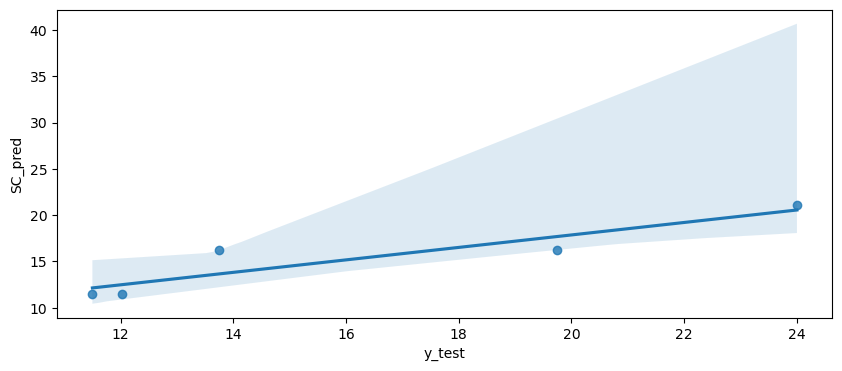

In [295]:
plt.subplots(figsize = (10,4))
sns.regplot(x = y_test, y = SC_pred)

 ## Residual distance decreased i.e error is reduced between actual and estimated or predicted values

In [260]:
y_test = pd.DataFrame(data = y_test, columns=['y_test'])
SC_pred = pd.DataFrame(data = SC_pred, columns=['SC_pred'])
compare_SC = pd.concat([y_test, SC_pred], axis = 1)
compare_SC

,y_test,SC_pred
0,24.00,21.077692
1,11.50,11.468462
2,19.75,16.273077
3,13.75,16.273077
4,12.03,11.468462


<Axes: >

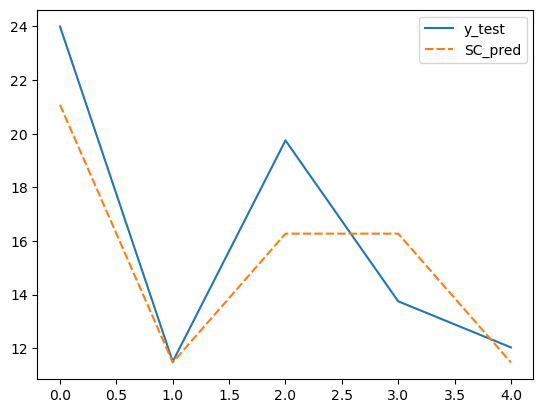

In [261]:
sns.lineplot(data = compare_SC)       ## We can see the error has reduced and model is fit for future predictions.

# Model Diagnostics

### The R2_score of Linear Regression testing is : 0.55

### The R2_score of  Ridge Regression testing is: 0.56

### The R2_score of Standard Scalar testing is : 0.77

# So, 77% of the variation in "Delivery Time" is explained by "Sorting Time"